# Netflix stock analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [2]:
nf = pd.read_csv("Netflix.csv")
nf.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


# data cleaning

In [4]:
print(nf.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [5]:
sns.set(rc={'figure.figsize': (10,5)})

# change indexing 

In [7]:
nf['Date'] = pd.to_datetime(nf['Date'])
nf = nf.set_index('Date')
nf.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


# drow stock VS time 

Text(0.5, 1.0, 'Volume of stock V/S Time')

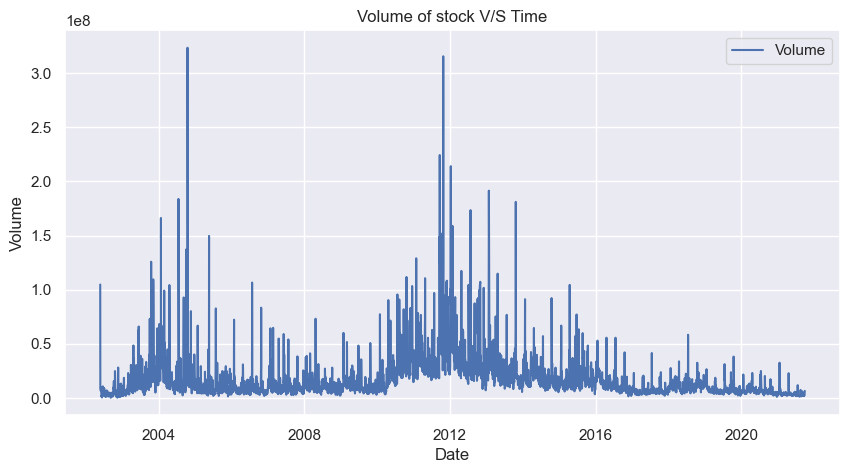

In [8]:
sns.lineplot(x=nf.index, y=nf['Volume'], label = 'Volume')
plt.title("Volume of stock V/S Time")

# Netflix stock price for - [High, open, close]

<Axes: title={'center': 'Netflix stock price'}, xlabel='Date'>

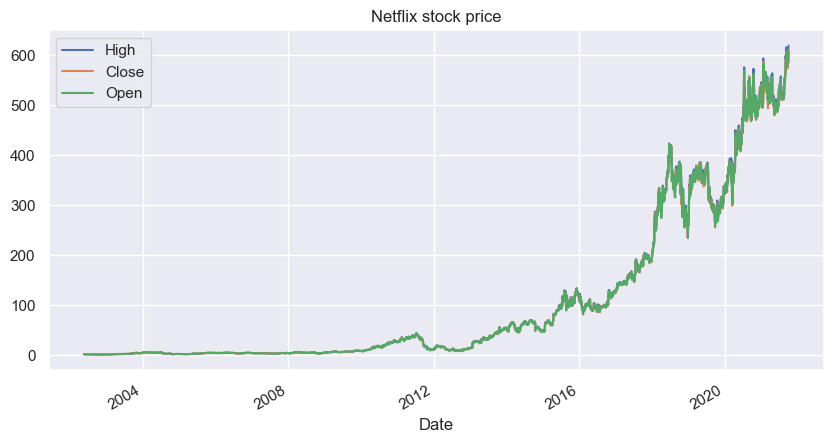

In [12]:
nf.plot(y=["High", "Close", "Open"], title="Netflix stock price")


# Netflix Stock price for : [Day, month, year]

<Axes: xlabel='Year'>

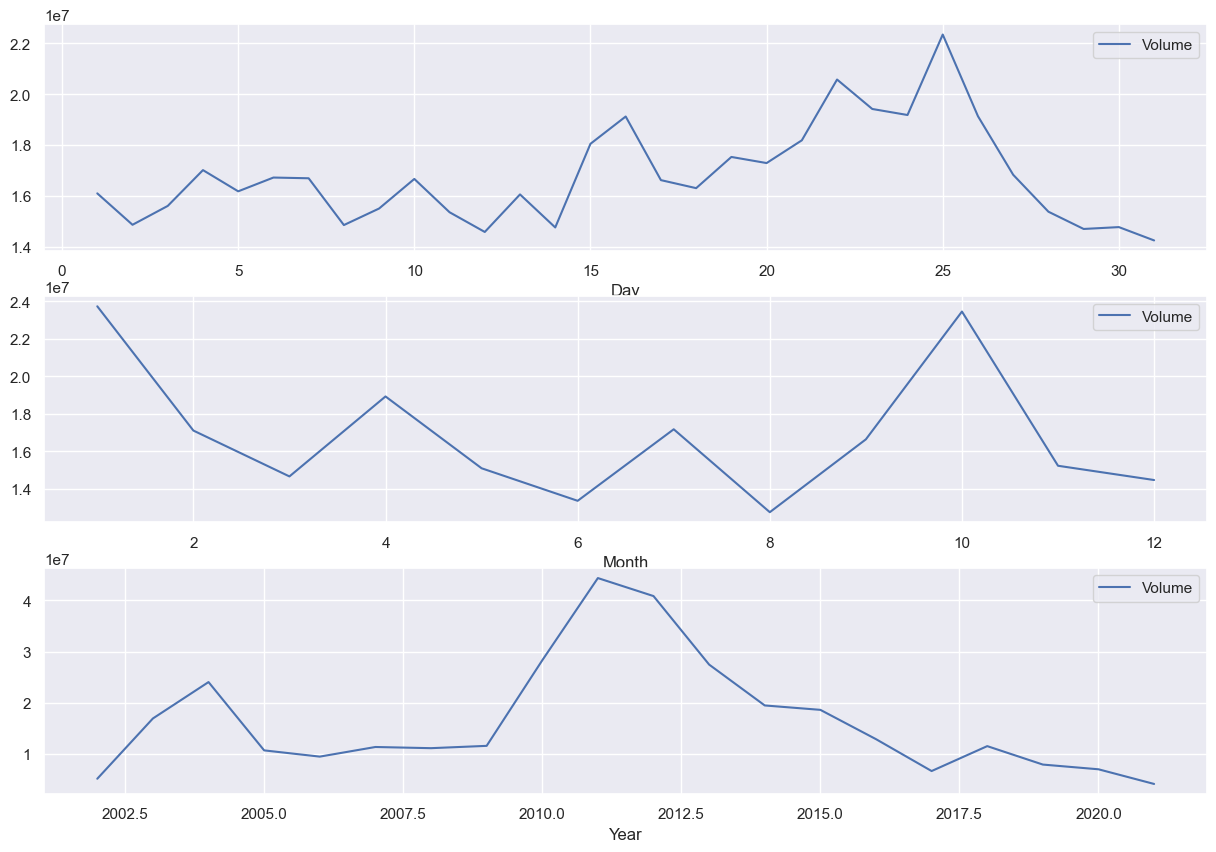

In [29]:
fig, (ax1, ax2, ax3)= plt.subplots(3, figsize = (15, 10))
nf.groupby(nf.index.day).mean().plot(y='Volume', ax =ax1, xlabel='Day')
nf.groupby(nf.index.month).mean().plot(y='Volume', ax = ax2, xlabel='Month')
nf.groupby(nf.index.year).mean().plot(y='Volume', ax = ax3, xlabel = 'Year')

# Top5 : Data with Highest stock price

In [30]:
a = nf.sort_values(by = 'High', ascending = False).head(5)
a['High']

Date
2021-09-30    619.000000
2021-09-08    615.599976
2021-09-07    613.849976
2021-09-29    609.880005
2021-09-10    609.450012
Name: High, dtype: float64

# Top5 : Data with Lowest stock price


In [32]:
a = nf.sort_values(by = 'Low', ascending = True).head(5)
a['Low']

Date
2002-10-10    0.346429
2002-10-09    0.347143
2002-10-07    0.382143
2002-10-08    0.390714
2002-10-16    0.442857
Name: Low, dtype: float64

# Compare with help of graph high and low stock value per periods of time

<Axes: xlabel='Date', ylabel='Low'>

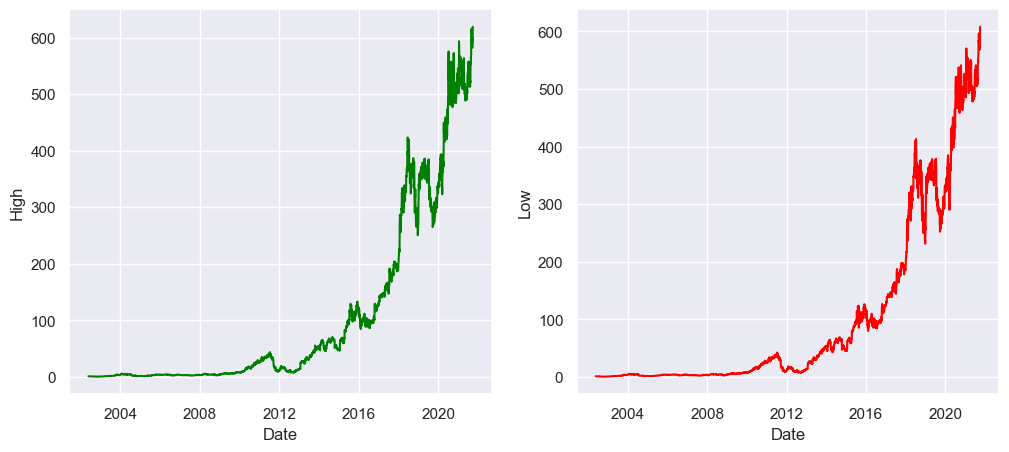

In [46]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, sharex = True, figsize = (12,5))
fig.suptitle=('High & Low Value of stock per priode of time')
sns.lineplot(ax = axes[0], y = nf['High'], x = nf.index, color="Green")
sns.lineplot(ax = axes[1], y = nf['Low'], x = nf.index, color = "red")
